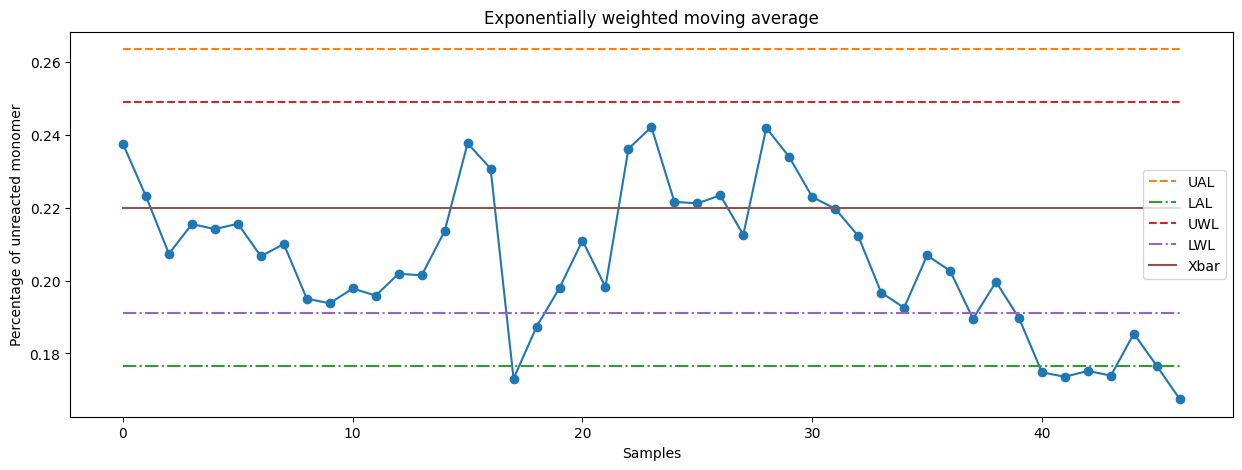

In [12]:
# Exponentially weighted moving average
# EWMA chart is a type of moving mean chart in which an ‘exponentially weighted mean’ is calculated each time a new result becomes available. 
# new weighted mean = (a * new result) + ((1-a) * previous mean), where a is the ‘smoothing constant’. It has a value between 0 and 1; many people use a = 0.2.
# These control charts are used for low frequency data i.e. sampling interval between two consecutive measurements is considerably high (one hour, two hours, one day, etc.) 
# This python code creates EWMA for unreacted monomer at an intermediate stage in a polymerization process

# Chapter 7, Statistical Process Control By John Oakland
# another reference: https://itl.nist.gov/div898/handbook/pmc/section3/pmc324.htm

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#from google.colab import files
#uploaded = files.upload()

#import io
#data = pd.read_csv(io.BytesIO(uploaded['example2_exercise7.csv']))

# data from process that is in statistical control
xlsx = pd.ExcelFile("/content/Table 7.1.xlsx")
data = pd.read_excel(xlsx, 'Sheet2',header=None)

data = np.array(data)
data = data[:,1]
data = data.reshape(len(data),1)
# print(data.shape)

# TO compute control limits, we need data from the polymerization process when it was in statistical control, i.e. able to produce a product that meets a predefined product specificaiton
# The following process mean or grand mean is computed by taking average of the mean values obtained for each data winow (this data window moves forward by neglecting oldest data point and accepting newest data point) of normal operation data
# Similary, mean range is obtained.

n = 4   # size of moving window
Xdbar = 0.22   # grand mean or process mean
meanR = 0.079  # mean range
CL = Xdbar   # central line

a = 0.25     # selection of a suitable for a is very important and can have significant impact on the chart
dn = 2.059
sigma = meanR/dn
SE = sigma * (np.sqrt(a/(2-a)))
#print(SE)

# control limits for action and warning lines

LAL = CL - 3 * SE
LWL = CL - 2 * SE
UWL = CL + 2 * SE
UAL = CL + 3 * SE

previous_mean = CL # target value or mean of historical data (or normal operation data)

ewma = []
for i in range (0, len(data)):
  #print(data[i,:])
  new_measurement = data[i,:]
  xx = a * new_measurement + (1-a) * previous_mean
  ewma.append(xx)
  previous_mean = xx

ewma = np.array(ewma)


plt.figure(figsize=(15,5))
plt.plot(ewma,'-o')
plt.plot(UAL * np.ones((len(ewma),1)), '--', label='UAL')
plt.plot(LAL * np.ones((len(ewma),1)), '-.', label='LAL')
plt.plot(UWL * np.ones((len(ewma),1)), '--', label='UWL')
plt.plot(LWL * np.ones((len(ewma),1)), '-.', label='LWL')
plt.plot(CL* np.ones((len(ewma),1)), label='Xbar')   # central or target line
plt.xlabel("Samples")
plt.ylabel("Percentage of unreacted monomer")
plt.legend()
# displaying the title
plt.title("Exponentially weighted moving average")
plt.show()

